In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Définir le style des visualisations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [3]:
# Charger les données
file_path = "../Data/raw/atus_full_selected.csv"
df = pd.read_csv(file_path)

In [4]:
# Afficher les premières lignes du dataset
print("Aperçu des données :")
display(df.head())

Aperçu des données :


,TUCASEID,TUACTIVITY_N,TUACTDUR24,TUSTARTTIM,TEWHERE,ACTIVITY_NAME,TUDIARYDAY,TUFNWGTP001,TUFNWGTP002,GEMETSTA,GTMETSTA
0,20030100013280,1,60,04:00:00,9,Personal Care Activities,6,7323431.0,12200000.0,1,-1
1,20030100013280,2,30,05:00:00,-1,Household Activities,6,7323431.0,12200000.0,1,-1
2,20030100013280,3,600,05:30:00,-1,Caring For & Helping Household (HH) Members,6,7323431.0,12200000.0,1,-1
3,20030100013280,4,150,15:30:00,1,Caring for & Helping Nonhousehold (NonHH) Members,6,7323431.0,12200000.0,1,-1
4,20030100013280,5,5,18:00:00,1,Work & Work-Related Activities,6,7323431.0,12200000.0,1,-1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347093 entries, 0 to 3347092
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   TUCASEID       int64  
 1   TUACTIVITY_N   int64  
 2   TUACTDUR24     int64  
 3   TUSTARTTIM     object 
 4   TEWHERE        int64  
 5   ACTIVITY_NAME  object 
 6   TUDIARYDAY     int64  
 7   TUFNWGTP001    float64
 8   TUFNWGTP002    float64
 9   GEMETSTA       int64  
 10  GTMETSTA       int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 280.9+ MB


In [6]:
# Afficher la forme du dataset
print(f"\nDimensions du dataset : {df.shape}")


Dimensions du dataset : (3347093, 11)


In [7]:
# Afficher les types de données
print("\nTypes de données :")
print(df.dtypes)


Types de données :
TUCASEID           int64
TUACTIVITY_N       int64
TUACTDUR24         int64
TUSTARTTIM        object
TEWHERE            int64
ACTIVITY_NAME     object
TUDIARYDAY         int64
TUFNWGTP001      float64
TUFNWGTP002      float64
GEMETSTA           int64
GTMETSTA           int64
dtype: object


In [8]:
# Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


Valeurs manquantes par colonne :
TUCASEID              0
TUACTIVITY_N          0
TUACTDUR24            0
TUSTARTTIM            0
TEWHERE               0
ACTIVITY_NAME    763110
TUDIARYDAY            0
TUFNWGTP001           0
TUFNWGTP002           0
GEMETSTA              0
GTMETSTA              0
dtype: int64


In [9]:
# Statistiques descriptives
print("\n✅ Statistiques descriptives des colonnes numériques :")
display(df.describe())


✅ Statistiques descriptives des colonnes numériques :


,TUCASEID,TUACTIVITY_N,TUACTDUR24,TEWHERE,TUDIARYDAY,TUFNWGTP001,TUFNWGTP002,GEMETSTA,GTMETSTA
count,3.347093e+06,3.347093e+06,3.347093e+06,3.347093e+06,3.347093e+06,3.347093e+06,3.347093e+06,3.347093e+06,3.347093e+06
mean,2.008538e+13,1.198248e+01,7.350034e+01,4.120066e+00,3.980755e+00,6.614841e+06,6.620492e+06,-6.188788e-01,8.058566e-01
std,3.815143e+10,8.507737e+00,9.986215e+01,6.974539e+00,2.307969e+00,6.338694e+06,7.450391e+06,8.503977e-01,9.046464e-01
min,2.003010e+13,1.000000e+00,1.000000e+00,-3.000000e+00,1.000000e+00,1.566915e+05,1.302141e+05,-1.000000e+00,-1.000000e+00
25%,2.005071e+13,5.000000e+00,1.500000e+01,1.000000e+00,2.000000e+00,2.655114e+06,2.127190e+06,-1.000000e+00,1.000000e+00
50%,2.008111e+13,1.000000e+01,3.000000e+01,1.000000e+00,4.000000e+00,4.783635e+06,4.280356e+06,-1.000000e+00,1.000000e+00
75%,2.012030e+13,1.700000e+01,9.000000e+01,8.000000e+00,6.000000e+00,8.148153e+06,8.335296e+06,-1.000000e+00,1.000000e+00
max,2.015121e+13,9.100000e+01,1.313000e+03,9.900000e+01,7.000000e+00,1.370000e+08,1.700000e+08,3.000000e+00,3.000000e+00


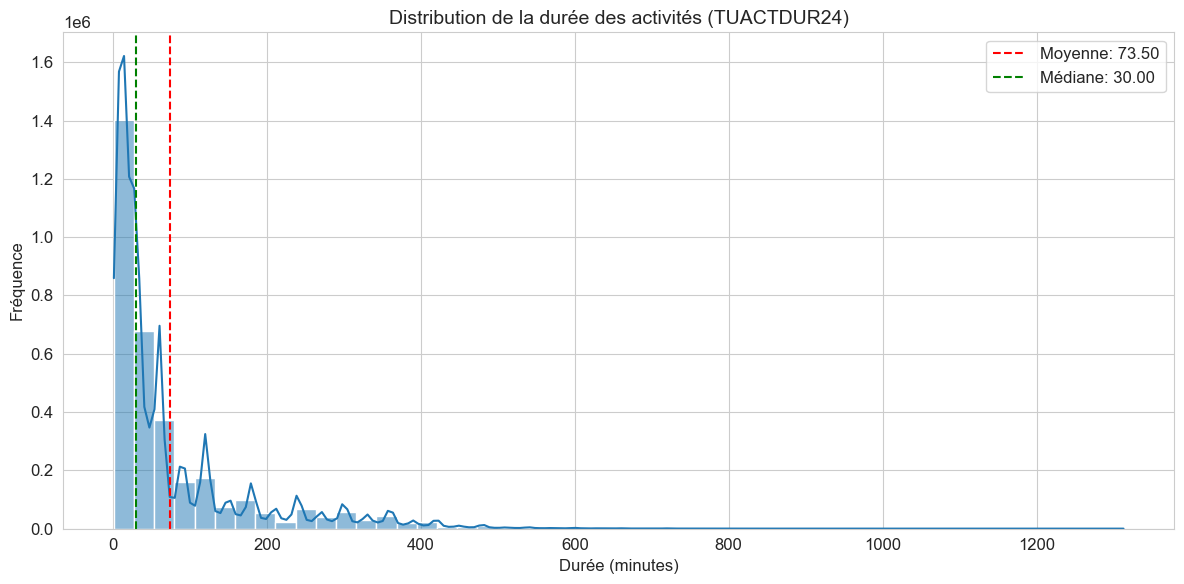

In [10]:
# Distribution de la durée des activités
plt.figure(figsize=(12, 6))
sns.histplot(df['TUACTDUR24'], bins=50, kde=True)
plt.title("Distribution de la durée des activités (TUACTDUR24)", fontsize=14)
plt.xlabel("Durée (minutes)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.axvline(df['TUACTDUR24'].mean(), color='red', linestyle='--', label=f"Moyenne: {df['TUACTDUR24'].mean():.2f}")
plt.axvline(df['TUACTDUR24'].median(), color='green', linestyle='--', label=f"Médiane: {df['TUACTDUR24'].median():.2f}")
plt.legend()
plt.tight_layout()
plt.show()

C:\Windows\Temp\ipykernel_14736\252755260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_activities.values, y=top_activities.index, palette="viridis")


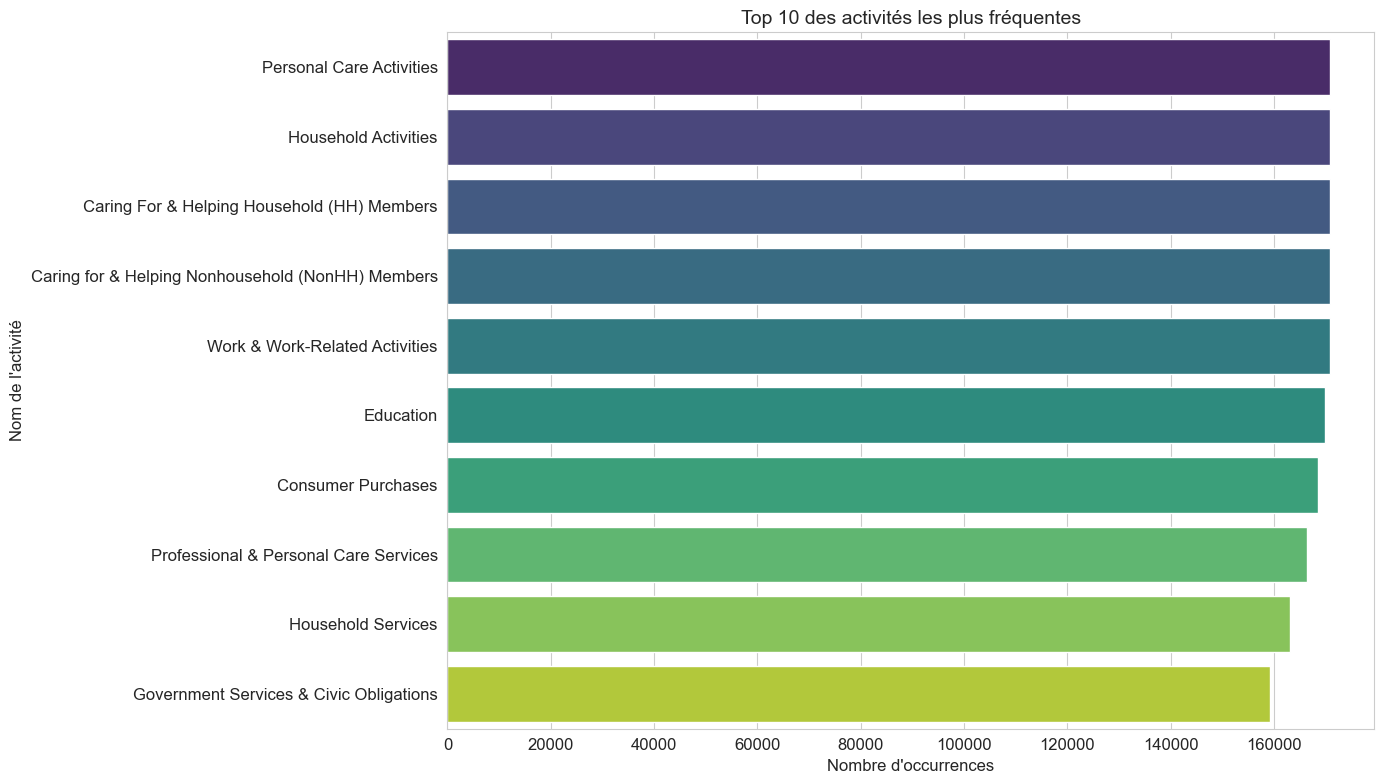

In [11]:
# Top 10 des activités les plus fréquentes
plt.figure(figsize=(14, 8))
top_activities = df['ACTIVITY_NAME'].value_counts().head(10)
sns.barplot(x=top_activities.values, y=top_activities.index, palette="viridis")
plt.title("Top 10 des activités les plus fréquentes", fontsize=14)
plt.xlabel("Nombre d'occurrences", fontsize=12)
plt.ylabel("Nom de l'activité", fontsize=12)
plt.tight_layout()
plt.show()

C:\Windows\Temp\ipykernel_14736\143660803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TEWHERE', data=df, palette="Set2")


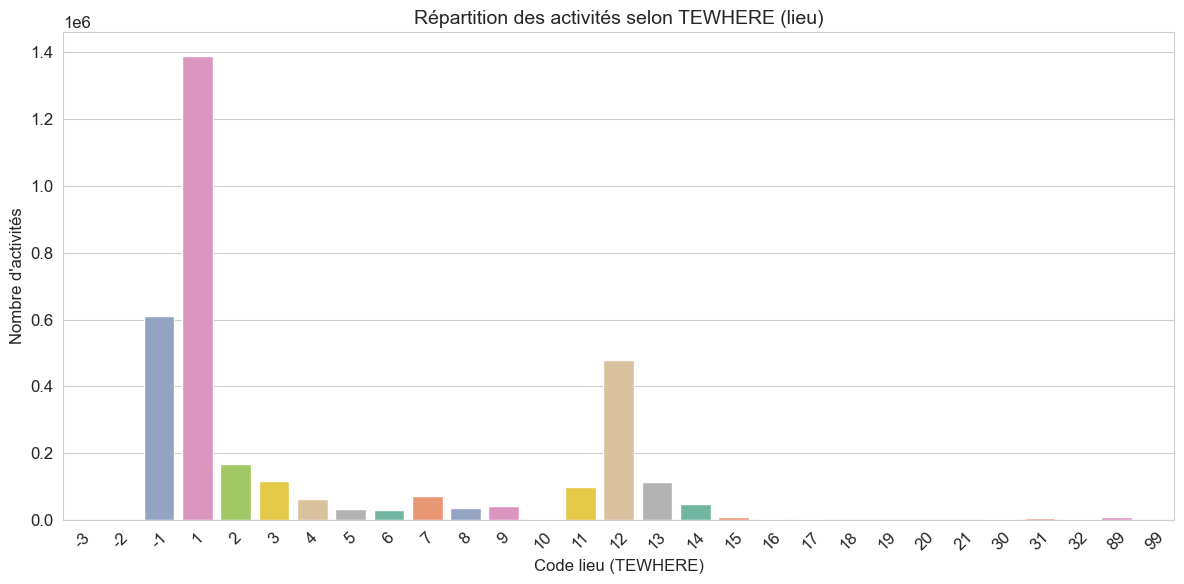

In [12]:
# Répartition des activités selon le lieu
plt.figure(figsize=(12, 6))
sns.countplot(x='TEWHERE', data=df, palette="Set2")
plt.title("Répartition des activités selon TEWHERE (lieu)", fontsize=14)
plt.xlabel("Code lieu (TEWHERE)", fontsize=12)
plt.ylabel("Nombre d'activités", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Windows\Temp\ipykernel_14736\3535087203.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="rocket")


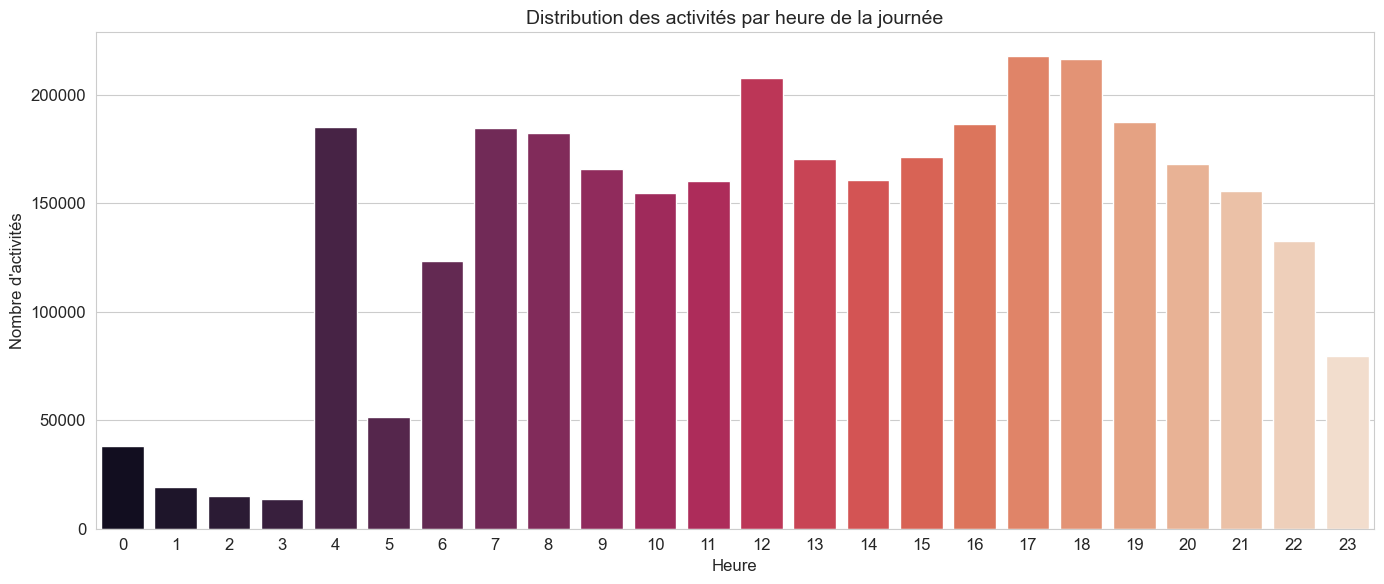

In [13]:
# Distribution des activités par heure de la journée
plt.figure(figsize=(14, 6))
# Convertir TUSTARTTIM en heure du jour (0-23)
df['hour'] = df['TUSTARTTIM'].apply(lambda x: int(str(x).zfill(4)[:2]) if pd.notnull(x) else np.nan)
hour_counts = df.groupby('hour').size()
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="rocket")
plt.title("Distribution des activités par heure de la journée", fontsize=14)
plt.xlabel("Heure", fontsize=12)
plt.ylabel("Nombre d'activités", fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

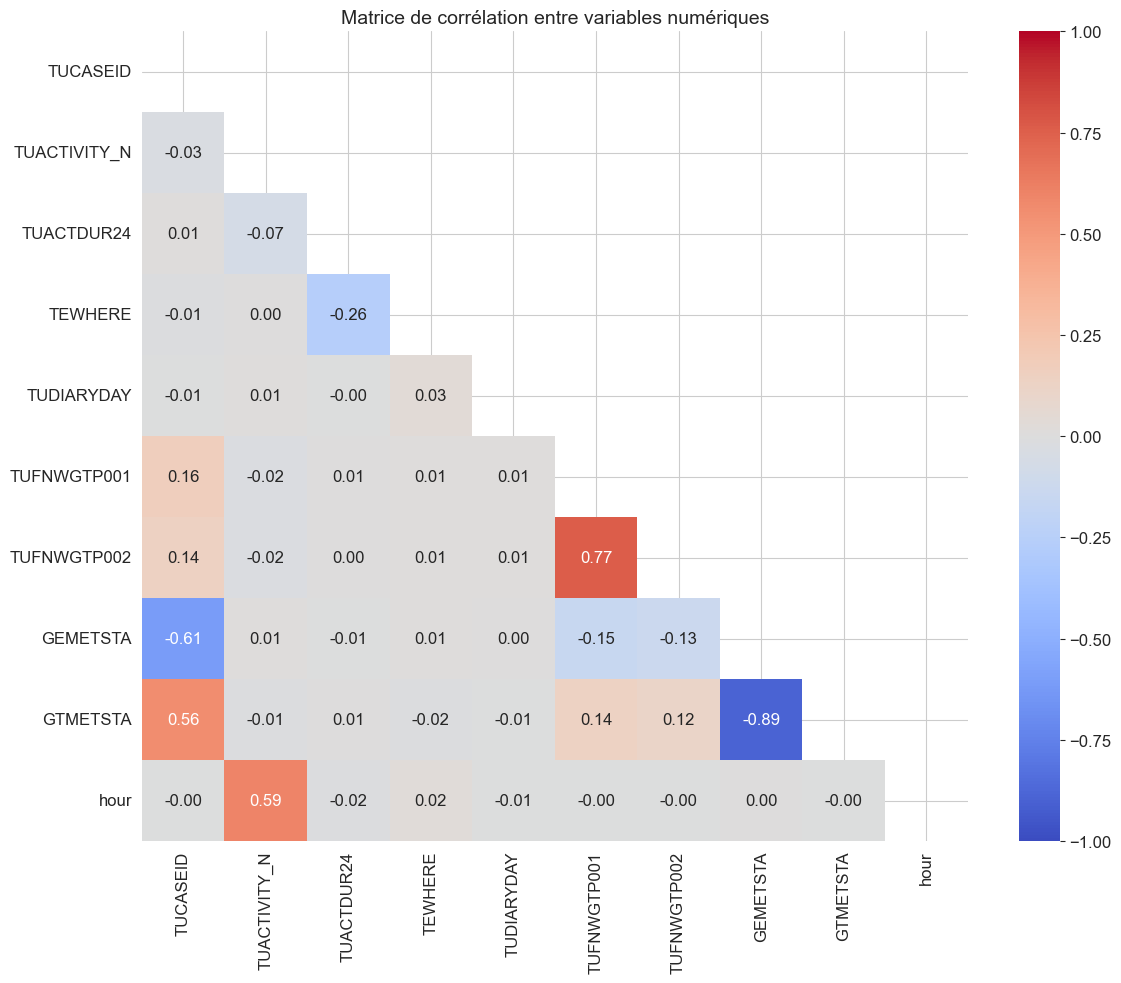

In [14]:
# Matrice de corrélation
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask, vmin=-1, vmax=1)
plt.title("Matrice de corrélation entre variables numériques", fontsize=14)
plt.tight_layout()
plt.show()

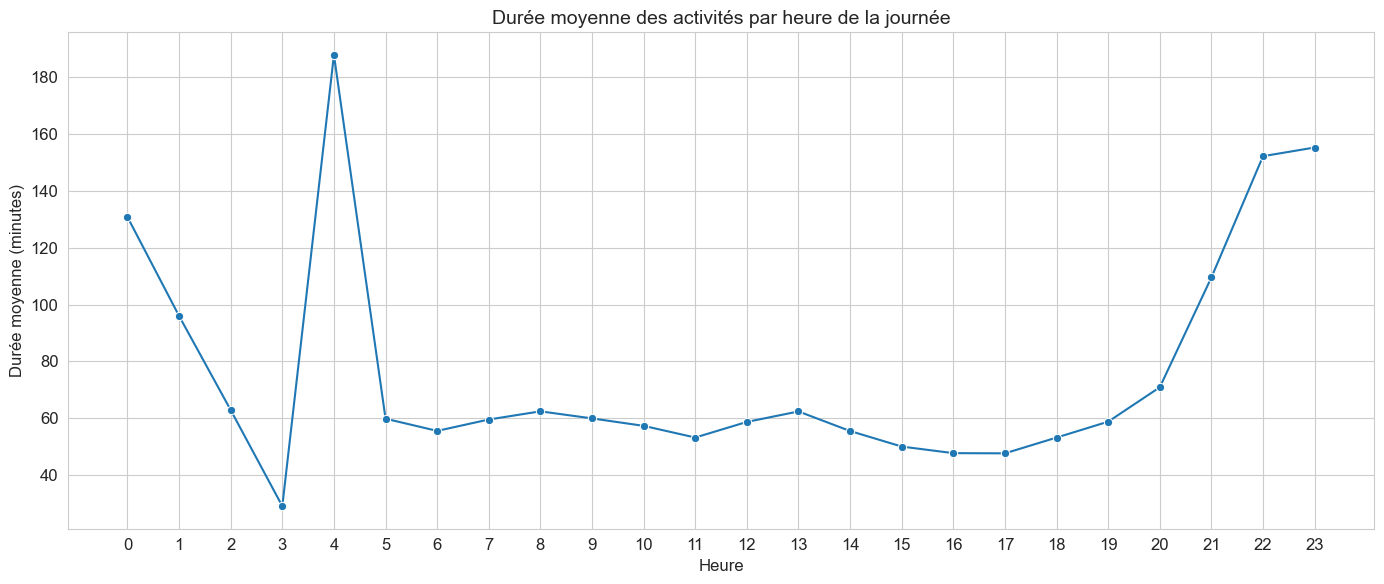

In [15]:
# Analyse temporelle : durée moyenne des activités par heure
plt.figure(figsize=(14, 6))
hour_durations = df.groupby('hour')['TUACTDUR24'].mean()
sns.lineplot(x=hour_durations.index, y=hour_durations.values, marker='o')
plt.title("Durée moyenne des activités par heure de la journée", fontsize=14)
plt.xlabel("Heure", fontsize=12)
plt.ylabel("Durée moyenne (minutes)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()